In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [2]:
train_path = '/kaggle/input/gtsrb-german-traffic-sign/Train/'

In [3]:
X_Images = []
y_Labels = []

#Retrieving the images and their labels 
for i in range(43):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            X_Images.append(image)
            y_Labels.append(i)
        except:
            print("Error loading image")

In [4]:
classes = len(set(y_Labels))
classes

43

In [5]:
X_Images = np.array(X_Images)
y_Labels = np.array(y_Labels)

print(X_Images.shape, y_Labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
#Splitting training and testing dataset
X_train, X_val_test, y_train, y_val_test = train_test_split(X_Images, y_Labels, test_size=0.25
                                                            , shuffle=True, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=True
                                                  , random_state=0)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(29406, 30, 30, 3) (4901, 30, 30, 3) (4902, 30, 30, 3) (29406,) (4901,) (4902,)


In [7]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, classes)
y_val = to_categorical(y_val, classes)
y_test = to_categorical(y_test, classes)

In [8]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(classes, activation='softmax'))

In [9]:
#Compilation of the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          36928     
                                                        

In [11]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30


2023-03-25 16:12:32.640143: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


919/919 [==============================] - 18s 7ms/step - loss: 3.5414 - accuracy: 0.1175 - val_loss: 2.6214 - val_accuracy: 0.3997
Epoch 2/30
919/919 [==============================] - 7s 7ms/step - loss: 2.4264 - accuracy: 0.3733 - val_loss: 1.5316 - val_accuracy: 0.6095
Epoch 3/30
919/919 [==============================] - 7s 7ms/step - loss: 1.7258 - accuracy: 0.5258 - val_loss: 0.9304 - val_accuracy: 0.7621
Epoch 4/30
919/919 [==============================] - 7s 8ms/step - loss: 1.2383 - accuracy: 0.6529 - val_loss: 0.6085 - val_accuracy: 0.8792
Epoch 5/30
919/919 [==============================] - 7s 7ms/step - loss: 0.8958 - accuracy: 0.7477 - val_loss: 0.3248 - val_accuracy: 0.9323
Epoch 6/30
919/919 [==============================] - 7s 7ms/step - loss: 0.6655 - accuracy: 0.8105 - val_loss: 0.2240 - val_accuracy: 0.9543
Epoch 7/30
919/919 [==============================] - 7s 7ms/step - loss: 0.5286 - accuracy: 0.8474 - val_loss: 0.1398 - val_accuracy: 0.9725
Epoch 8/30
919/9

In [12]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test,batch_size=32)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

154/154 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9935
Test Loss is 0.03744031861424446
Test Accuracy is 0.9934720396995544


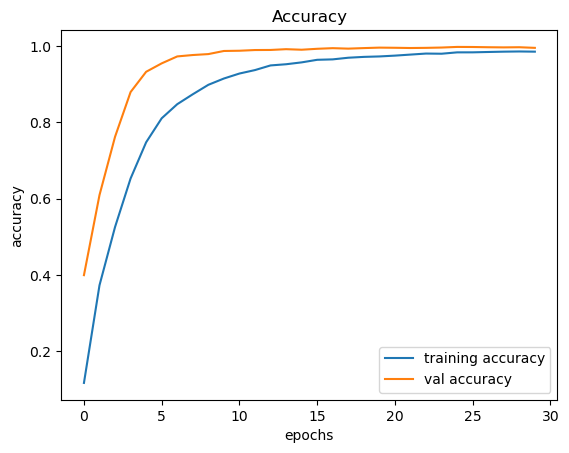

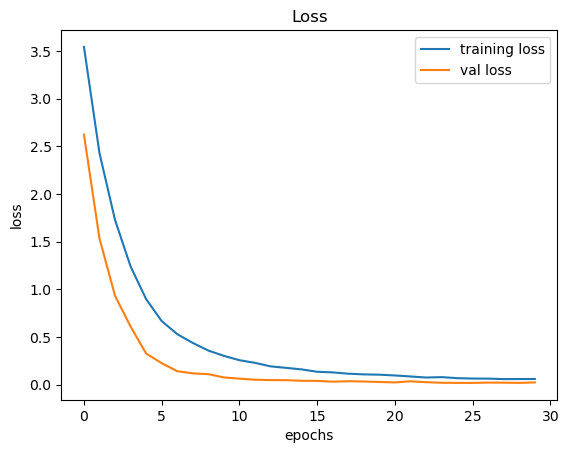

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values
data=[]

for img in imgs:
    image = Image.open('/kaggle/input/gtsrb-german-traffic-sign/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
Test=np.array(data)

In [15]:
pred = np.argmax(model.predict(Test),axis=1)

395/395 [==============================] - 1s 3ms/step


In [16]:
#Accuracy with the test data
print(accuracy_score(labels, pred))

0.966270783847981


In [17]:
model.save('/kaggle/Output/traffic_classifier.h5')